**Analyses of data formed by pooling together data of every day (300 in total), including enzyme production rate (manipulated via changing the consitutive and inducible enzyme producton rates)**

- **Objective**: to uncover an eqution that can replace both the MM and reverse MM and model the rate variations across time and space.

- Regresson analysis done by exporting the data genetrated and analyzing using R

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cellulose

In [2]:
# load in the data
Cellulose = pd.read_csv('Cellulose_Average.csv',index_col=0)
Cellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
NaN,1.472924e+06,0.000000,0.000000,30.0
1.0,1.472922e+06,0.118909,1.780127,30.0
2.0,1.472919e+06,0.227270,3.402255,30.0
3.0,1.472914e+06,0.326485,4.887281,30.0
4.0,1.472908e+06,0.417728,6.252684,30.0


In [3]:
# get rid of the NaN value
Cellulose.index = Cellulose.index.fillna(0.0)
Cellulose.shape

(6600, 4)

In [4]:
# divided by the grid size besides Enz_rate
Cellulose.iloc[:,[0,1,2]] = Cellulose.iloc[:,[0,1,2]]/10000
# divide the Enz_rate by 10e5
Cellulose.iloc[:,3] = Cellulose.iloc[:,3]/100000 
Cellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,147.292400,0.000000,0.000000,0.0003
1.0,147.292222,0.000012,0.000178,0.0003
2.0,147.291882,0.000023,0.000340,0.0003
3.0,147.291393,0.000033,0.000489,0.0003
4.0,147.290768,0.000042,0.000625,0.0003


In [5]:
Cellulose.loc[[300,600,900],'Substrate_series']

300    147.2924
600    147.2924
900    147.2924
Name: Substrate_series, dtype: float64

In [6]:
# calculate the substrate input rate and add it to the df as a new column
Subinput_rate = (147.2924/np.arange(1,301)).tolist() * 22
Cellulose['Subinput_rate'] = Subinput_rate
Cellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
0.0,147.292400,0.000000,0.000000,0.0003,147.292400
1.0,147.292222,0.000012,0.000178,0.0003,73.646200
2.0,147.291882,0.000023,0.000340,0.0003,49.097467
3.0,147.291393,0.000033,0.000489,0.0003,36.823100
4.0,147.290768,0.000042,0.000625,0.0003,29.458480


In [7]:
#get rid of the data of Enz_rate = 10.5e-5
Cellulose = Cellulose[Cellulose.Enz_rate != 10.5e-5]
Cellulose.shape

(6300, 5)

In [8]:
# Save dataframe to a csv file for futher analyses with R
#Cellulose.to_csv("Cellulose.csv")

### ECA model

In [9]:
Cellulose_15 = Cellulose[Cellulose.Enz_rate == 15.0e-5]
Cellulose_15.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
2095.0,0.000607,0.077154,0.000014,0.00015,0.497609
2096.0,0.000594,0.074986,0.000013,0.00015,0.495934
2097.0,0.000581,0.072874,0.000013,0.00015,0.494270
2098.0,0.000569,0.070819,0.000012,0.00015,0.492617
2099.0,0.000558,0.068819,0.000011,0.00015,0.490975


In [10]:
def ECA(Substrate,Enzyme):
    Vmax = 30.5612
    K    = 158.1958
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [11]:
# predicted rate 
Rate_ECA1 = ECA(Cellulose_15['Substrate_series'],Cellulose_15['Enzyme_series'])

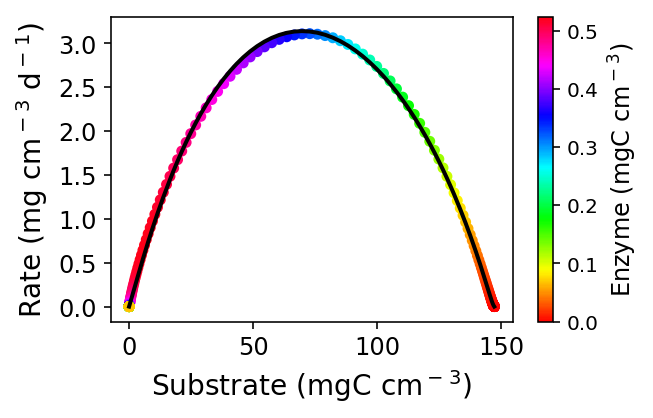

In [16]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_15['Substrate_series'],Cellulose_15['Decayrates_series'],s=20,
           c=Cellulose_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(Cellulose_15['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=1.0)

ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate.pdf',bbox_inches='tight')

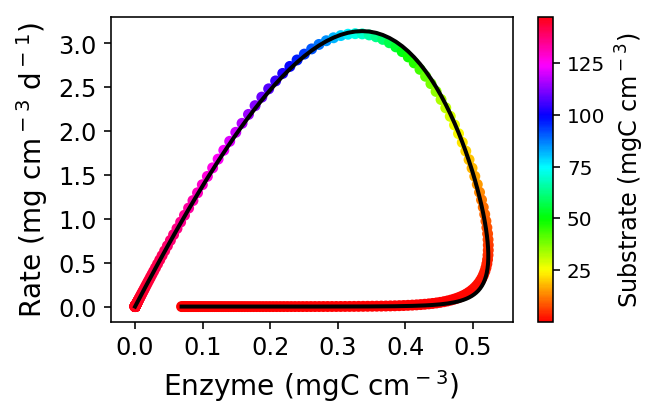

In [17]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_15['Enzyme_series'],Cellulose_15['Decayrates_series'],s=20,
                c=Cellulose_15['Substrate_series'],cmap='hsv',alpha=1)

ax.plot(Cellulose_15['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=1.0)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme.pdf',bbox_inches='tight')

## Other enzyme production rates

In [14]:
index = (Cellulose.Enz_rate == 5.0e-5)|(Cellulose.Enz_rate == 10.0e-5)|(Cellulose.Enz_rate == 15.0e-5)|(Cellulose.Enz_rate == 20.0e-5)|(Cellulose.Enz_rate == 30.0e-5)
Cellulose_1 = Cellulose[index]
Cellulose_1.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
5395.0,35.999817,0.195076,1.418508,0.00005,0.497609
5396.0,34.610721,0.196223,1.389096,0.00005,0.495934
5397.0,33.251909,0.197326,1.358813,0.00005,0.494270
5398.0,31.924034,0.198390,1.327874,0.00005,0.492617
5399.0,30.627696,0.199411,1.296338,0.00005,0.490975


In [15]:
def ECA(Substrate,Enzyme,Vmax,K):
    #Vmax = 35.0193
    #K    = 202.0175
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [16]:
Cellulose_5 = Cellulose[Cellulose.Enz_rate == 5.0e-5]
Cellulose_10= Cellulose[Cellulose.Enz_rate == 10.0e-5]
Cellulose_15= Cellulose[Cellulose.Enz_rate == 15.0e-5]
Cellulose_20= Cellulose[Cellulose.Enz_rate == 20.0e-5]
Cellulose_30= Cellulose[Cellulose.Enz_rate == 30.0e-5]

In [17]:
# predicted rate 
Rate_ECA_5 = ECA(Cellulose_5['Substrate_series'],Cellulose_5['Enzyme_series'],22.5057,75.0404)
Rate_ECA_10 = ECA(Cellulose_10['Substrate_series'],Cellulose_10['Enzyme_series'],24.9757,102.192)
Rate_ECA_15 = ECA(Cellulose_15['Substrate_series'],Cellulose_15['Enzyme_series'],30.5612,158.196)
Rate_ECA_20 = ECA(Cellulose_20['Substrate_series'],Cellulose_20['Enzyme_series'],33.2425,189.403)
Rate_ECA_30 = ECA(Cellulose_30['Substrate_series'],Cellulose_30['Enzyme_series'],51.635,379.492)

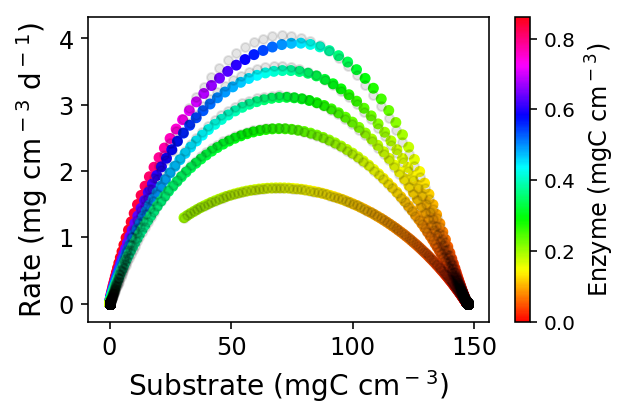

In [18]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_1['Substrate_series'],Cellulose_1['Decayrates_series'],s=20,
           c=Cellulose_1['Enzyme_series'],cmap='hsv',alpha=1.0)
#ax.plot(Cellulose_1['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=0.5)
ax.scatter(Cellulose_5['Substrate_series'],Rate_ECA_5,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_10['Substrate_series'],Rate_ECA_10,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_15['Substrate_series'],Rate_ECA_15,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_20['Substrate_series'],Rate_ECA_20,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_30['Substrate_series'],Rate_ECA_30,s=20, color='black',alpha=0.1)

ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(('1','2','3','4'))

cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate_Sensi.pdf',bbox_inches='tight')

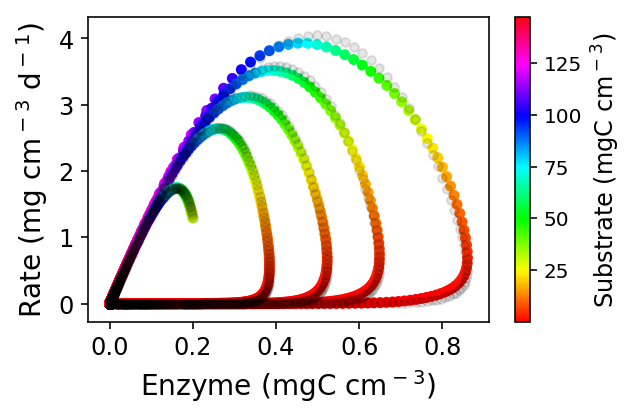

In [19]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_1['Enzyme_series'],Cellulose_1['Decayrates_series'],s=20,
                c=Cellulose_1['Substrate_series'],cmap='hsv',alpha=1)

#ax.plot(Cellulose_1['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=0.5)
#ax.scatter(Cellulose_1['Enzyme_series'],Rate_ECA1,s=20,color='black',alpha=0.1)

ax.scatter(Cellulose_5['Enzyme_series'],Rate_ECA_5,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_10['Enzyme_series'],Rate_ECA_10,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_15['Enzyme_series'],Rate_ECA_15,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_20['Enzyme_series'],Rate_ECA_20,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_30['Enzyme_series'],Rate_ECA_30,s=20, color='black',alpha=0.1)


ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme_Sensi.pdf',bbox_inches='tight')

# Lignin

In [3]:
# load in the data
Lignin = pd.read_csv('Lignin_Average.csv',index_col=0)
Lignin.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
NaN,486429.000000,0.000000,0.000000,30.0
1.0,486428.615702,0.039636,0.387500,30.0
2.0,486427.881209,0.075757,0.740614,30.0
3.0,486426.826105,0.108828,1.063897,30.0
4.0,486425.476193,0.139243,1.361161,30.0


In [6]:
# get rid of the NaN value
Lignin.index = Lignin.index.fillna(0.0)
Lignin.shape

(6600, 4)

In [7]:
# divided by the grid size besides Enz_rate
Lignin.iloc[:,[0,1,2]] = Lignin.iloc[:,[0,1,2]]/10000
# divide the Enz_rate by 10e5
Lignin.iloc[:,3] = Lignin.iloc[:,3]/100000 
Lignin.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,48.642900,0.000000,0.000000,0.0003
1.0,48.642862,0.000004,0.000039,0.0003
2.0,48.642788,0.000008,0.000074,0.0003
3.0,48.642683,0.000011,0.000106,0.0003
4.0,48.642548,0.000014,0.000136,0.0003


In [8]:
#get rid of the data of Enz_rate = 10.5e-5
Lignin = Lignin[Lignin.Enz_rate != 10.5e-5]
Lignin.shape

(6300, 4)

## Fit with ECA

In [9]:
Lignin_15 = Lignin[Lignin.Enz_rate == 15.0e-5]
Lignin_15.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
2095.0,0.003192,0.025718,0.000074,0.00015
2096.0,0.003122,0.024995,0.000070,0.00015
2097.0,0.003056,0.024291,0.000067,0.00015
2098.0,0.002993,0.023606,0.000063,0.00015
2099.0,0.002934,0.022940,0.000060,0.00015


In [10]:
def ECA(Substrate,Enzyme):
    Vmax = 14.8261
    K    = 27.2465
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [11]:
# predicted rate 
Rate_ECA1 = ECA(Lignin_15['Substrate_series'],Lignin_15['Enzyme_series'])

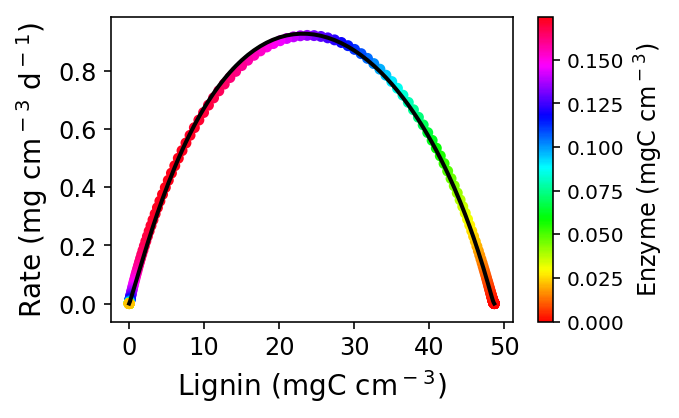

In [12]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Lignin_15['Substrate_series'],Lignin_15['Decayrates_series'],s=20,
           c=Lignin_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(Lignin_15['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=1.0)

ax.set_xlabel("Lignin (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate_Lignin.pdf',bbox_inches='tight')

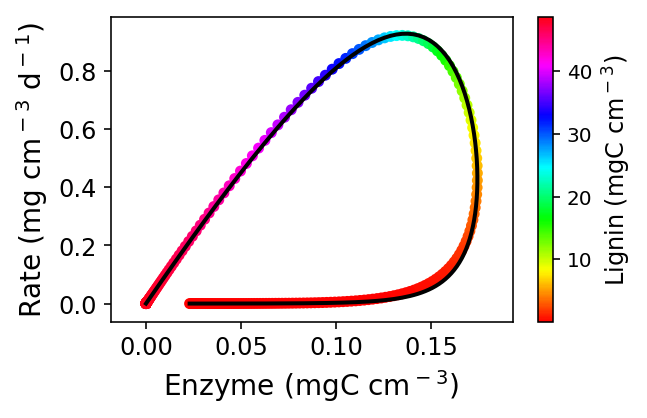

In [14]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Lignin_15['Enzyme_series'],Lignin_15['Decayrates_series'],s=20,
                c=Lignin_15['Substrate_series'],cmap='hsv',alpha=1)

ax.plot(Lignin_15['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=1.0)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Lignin (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme_Lignin.pdf',bbox_inches='tight')

# Hemicellulose

In [15]:
# load in the data
Hemicellulose = pd.read_csv('Hemicellulose_Average.csv',index_col=0)
Hemicellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
NaN,860902.000000,0.000000,0.000000,30.0
1.0,860901.019141,0.039636,0.980859,30.0
2.0,860899.144497,0.075757,1.874644,30.0
3.0,860896.451643,0.108828,2.692854,30.0
4.0,860893.006538,0.139243,3.445105,30.0


In [16]:
# get rid of the NaN value
Hemicellulose.index = Hemicellulose.index.fillna(0.0)
Hemicellulose.shape

(6600, 4)

In [17]:
# divided by the grid size besides Enz_rate
Hemicellulose.iloc[:,[0,1,2]] = Hemicellulose.iloc[:,[0,1,2]]/10000
# divide the Enz_rate by 10e5
Hemicellulose.iloc[:,3] = Hemicellulose.iloc[:,3]/100000 
Hemicellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,86.090200,0.000000,0.000000,0.0003
1.0,86.090102,0.000004,0.000098,0.0003
2.0,86.089914,0.000008,0.000187,0.0003
3.0,86.089645,0.000011,0.000269,0.0003
4.0,86.089301,0.000014,0.000345,0.0003


In [18]:
#get rid of the data of Enz_rate = 10.5e-5
Hemicellulose = Hemicellulose[Hemicellulose.Enz_rate != 10.5e-5]
Hemicellulose.shape

(6300, 4)

## Fit with ECA

In [19]:
Hemicellulose_15 = Hemicellulose[Hemicellulose.Enz_rate == 15.0e-5]
Hemicellulose_15.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
2095.0,0.001043,0.025718,0.000025,0.00015
2096.0,0.001020,0.024995,0.000023,0.00015
2097.0,0.000997,0.024291,0.000022,0.00015
2098.0,0.000976,0.023606,0.000021,0.00015
2099.0,0.000956,0.022940,0.000020,0.00015


In [20]:
def ECA(Substrate,Enzyme):
    Vmax = 48.030
    K    = 90.618
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [21]:
# predicted rate 
Rate_ECA1 = ECA(Hemicellulose_15['Substrate_series'],Hemicellulose_15['Enzyme_series'])

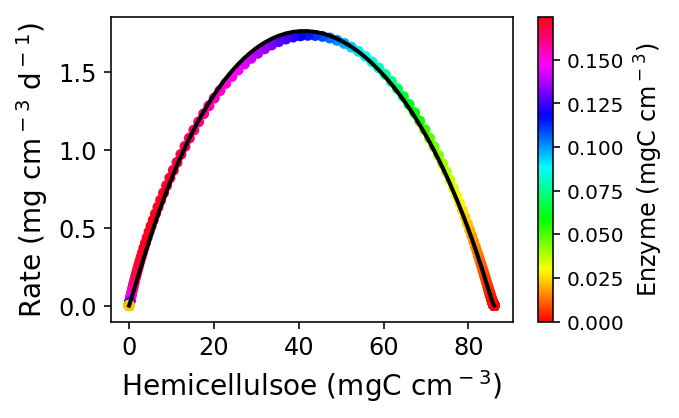

In [22]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Hemicellulose_15['Substrate_series'],Hemicellulose_15['Decayrates_series'],s=20,
           c=Hemicellulose_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(Hemicellulose_15['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=1.0)

ax.set_xlabel("Hemicellulsoe (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate_Hemicellulose.pdf',bbox_inches='tight')

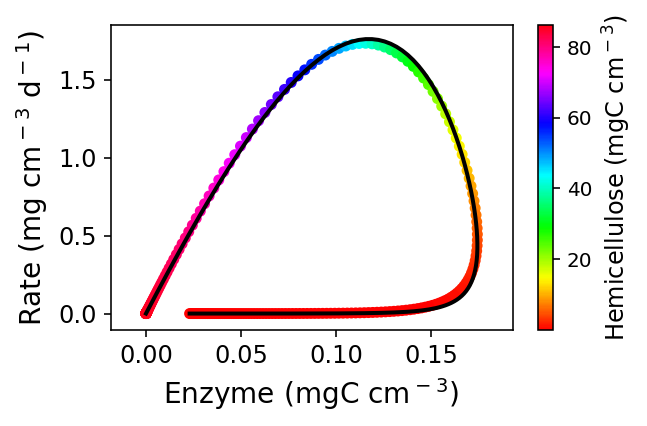

In [23]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Hemicellulose_15['Enzyme_series'],Hemicellulose_15['Decayrates_series'],s=20,
                c=Hemicellulose_15['Substrate_series'],cmap='hsv',alpha=1)

ax.plot(Hemicellulose_15['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=1.0)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Hemicellulose (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme_Hemicellulose.pdf',bbox_inches='tight')

# Chitin

In [24]:
# load in the data
Chitin = pd.read_csv('Chitin_Average.csv',index_col=0)
Chitin.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
NaN,50089.000000,0.000000,0.000000,30.0
1.0,50088.891628,0.039636,0.126434,30.0
2.0,50088.684524,0.075757,0.241622,30.0
3.0,50088.387076,0.108828,0.347022,30.0
4.0,50088.006630,0.139243,0.443855,30.0


In [25]:
# get rid of the NaN value
Chitin.index = Chitin.index.fillna(0.0)
Chitin.shape

(6600, 4)

In [26]:
# divided by the grid size besides Enz_rate
Chitin.iloc[:,[0,1,2]] = Chitin.iloc[:,[0,1,2]]/10000
# divide the Enz_rate by 10e5
Chitin.iloc[:,3] = Chitin.iloc[:,3]/100000 
Chitin.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,5.008900,0.000000,0.000000,0.0003
1.0,5.008889,0.000004,0.000013,0.0003
2.0,5.008868,0.000008,0.000024,0.0003
3.0,5.008839,0.000011,0.000035,0.0003
4.0,5.008801,0.000014,0.000044,0.0003


In [27]:
#get rid of the data of Enz_rate = 10.5e-5
Chitin = Chitin[Chitin.Enz_rate != 10.5e-5]
Chitin.shape

(6300, 4)

In [28]:
Chitin_15 = Chitin[Chitin.Enz_rate == 15.0e-5]
Chitin_15.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
2095.0,0.000014,0.025718,3.890981e-07,0.00015
2096.0,0.000014,0.024995,3.692296e-07,0.00015
2097.0,0.000014,0.024291,3.506629e-07,0.00015
2098.0,0.000013,0.023606,3.333257e-07,0.00015
2099.0,0.000013,0.022940,3.170833e-07,0.00015


In [29]:
def ECA(Substrate,Enzyme):
    Vmax = 31.58059616
    K    = 51.8024396
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [30]:
# predicted rate 
Rate_ECA1 = ECA(Chitin_15['Substrate_series'],Chitin_15['Enzyme_series'])

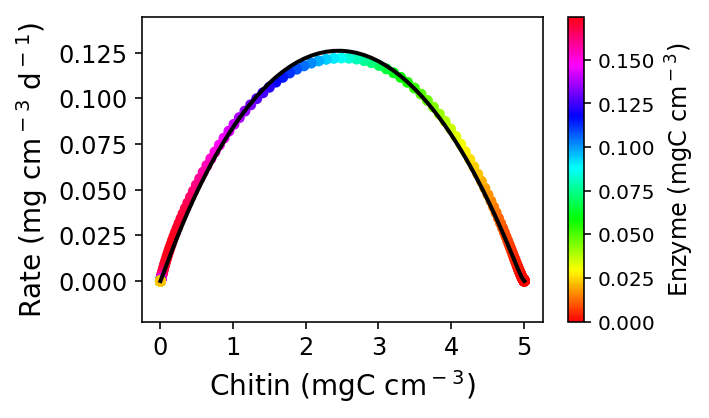

In [31]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Chitin_15['Substrate_series'],Chitin_15['Decayrates_series'],s=20,
           c=Chitin_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(Chitin_15['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=1.0)

ax.set_xlabel("Chitin (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate_Hemicellulose.pdf',bbox_inches='tight')

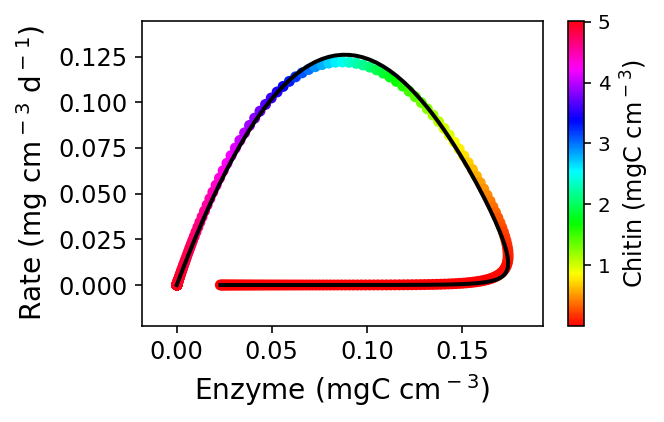

In [32]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Chitin_15['Enzyme_series'],Chitin_15['Decayrates_series'],s=20,
                c=Chitin_15['Substrate_series'],cmap='hsv',alpha=1)

ax.plot(Chitin_15['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=1.0)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Chitin (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme_Hemicellulose.pdf',bbox_inches='tight')

# Total substrates

In [34]:
# load in the data
Total = pd.read_csv('Total.csv',index_col=0)
Total.head()

,Substrate_tot,Enzyme_tot,Rate_tot
NaN,345.502300,0.000000,0.000000
NaN,345.501911,0.000061,0.000427
NaN,345.501160,0.000119,0.000826
NaN,345.500158,0.000173,0.001199
NaN,345.498749,0.000223,0.001549


In [35]:
# get rid of the NaN value
Total.index = Total.index.fillna(0.0)
Total.shape

(300, 3)

In [36]:
def ECA(Substrate,Enzyme):
    Vmax = 17.807
    K    = 1177.626
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [37]:
# predicted rate 
Rate_ECA1 = ECA(Total['Substrate_tot'],Total['Enzyme_tot'])

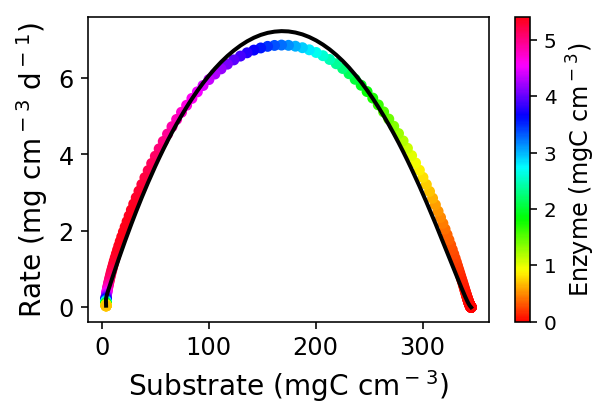

In [38]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Total['Substrate_tot'],Total['Rate_tot'],s=20,
           c=Total['Enzyme_tot'],cmap='hsv',alpha=1)
ax.plot(Total['Substrate_tot'],Rate_ECA1,linewidth=2, color='black',alpha=1.0)

ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate_Total.pdf',bbox_inches='tight')

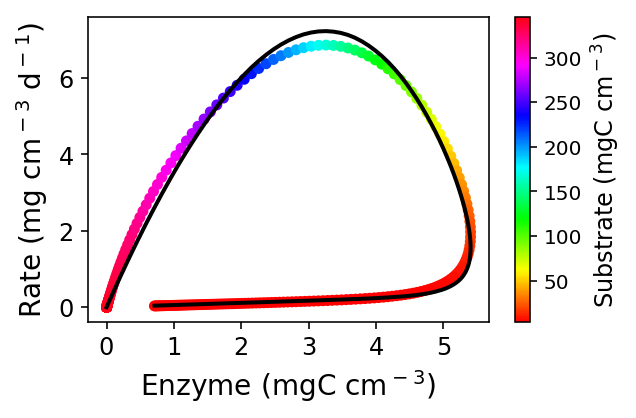

In [39]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Total['Enzyme_tot'],Total['Rate_tot'],s=20,
                c=Total['Substrate_tot'],cmap='hsv',alpha=1)

ax.plot(Total['Enzyme_tot'],Rate_ECA1,linewidth=2,color='black',alpha=1.0)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme_Total.pdf',bbox_inches='tight')